# Часть 1

## 1.1

<b>$A$</b> - у случайно выбранного человека редкая группа крови <br>
<b>$\bar{A}$</b> - у случайно выбранного человека не редкая группа крови <br>

<b>$H$</b> - случайно выбранный человек убийца <br>
<b>$\bar{H}$</b> - случайно выбранный человек не убийца

<b>$AH$</b> – случайно выбранный человек имеет редкую группу крови и он убийца <br>
<b>$A|H$</b> – случайно выбранный человек имеет редкую группу крови при условии что он убийца <br>
<b>$H|A$</b> – случайно выбранный человек убийца при условии что у него редкая группа крови <br>


<b>$P(A) = 0.01$</b><br>
<b>$P(H) = 0.000001$</b><br>
<b>$P(A|H) = 1$</b><br>


Прокурор: "Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен - всего 1%" - говорит про вероятность $P(A|\bar{H})$, тогда как 0.01 - это $P(A)$. Дальше из предыдущего заявления оценивает $P(H|A)$. <br>

Он и правда должен был оценить $P(H|A)$, но делает это неверно.

$P(H|A) = \frac{P(A|H)P(H)}{P(A)} = \frac{1*0.01}{0.000001} = 0.0001$

## 1.2

Адвокат: "В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь - это то, что подсудимый совершил убийство с вероятностью 0.01%" - говорит про вероятность $P(H|A)$.
В пункте выше мы вяснили, что данная вероятность действительно равна 0.01%. <br>
Получается что адвокат оценил правильно нужную вероятность и в целом прав.

## 1.3

<b>$A$</b> - болен <br>
<b>$\bar{A}$</b> - не болен<br>

<b>$H$</b> - тест показал что болен<br>
<b>$\bar{H}$</b> - тест не показал что болен<br>

$P(A) = 0.01$



$  $| $H$ | $\bar{H}$
--- | --- | ---
$A$ | TP | FP
$\bar{A}$ | FN | TN


$TP = P(H|A)$ <br>
$FP = P(\bar{H}|A)$ <br>
$FN = P(H|\bar{A})$ <br>
$TN = P(\bar{H}|\bar{A})$

$P(A|H) = \frac{P(H|A)P(A)}{P(H|A)P(A) + P(H|\bar{A})P(\bar{A})}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_posterior_a_h(fp=0.05, fn=0.05, P_a=0.01):
    tp = 1 - fp
    tn = 1 - fn
    P_a_h = tp * P_a / (tp * P_a + fn * (1 - P_a))
    return P_a_h

In [3]:
get_posterior_a_h()

0.16101694915254236

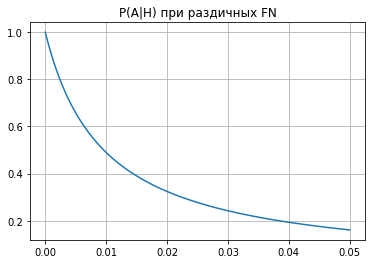

In [4]:
fig, ax = plt.subplots()
ax.grid()
list_fn = np.linspace(0, 0.05, 1001)
ax.plot(list_fn, [get_posterior_a_h(fn=fn) for fn in list_fn])
plt.title('P(A|H) при раздичных FN');

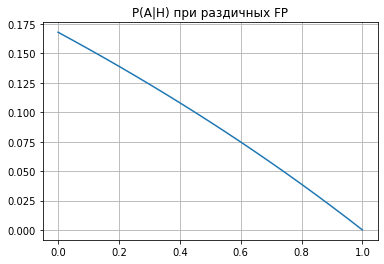

In [5]:
fig, ax = plt.subplots()
ax.grid()
list_fp = np.linspace(0, 1, 21)
ax.plot(list_fp, [get_posterior_a_h(fp=fp) for fp in list_fp])
plt.title('P(A|H) при раздичных FP');

На графиках представлены зависимости апостериорной вероятности P(A|H) от изменения FN и FP. В данном случае выгоднее улучшать FP, т.к. можно довести до большей вероятности.

In [6]:
def get_posterior_a_not_h(fp=0.05, fn=0.05, P_a=0.01):
    tp = 1 - fp
    tn = 1 - fn
    P_a_not_h = fp * P_a / (fp * P_a + tn * (1 - P_a))
    return P_a_not_h

get_posterior_a_not_h()

0.0005313496280552604

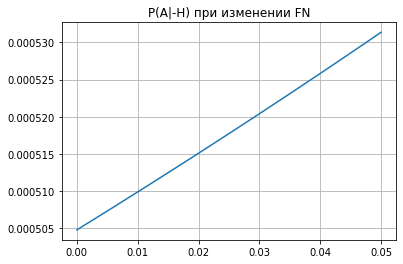

In [7]:
fig, ax = plt.subplots()
ax.grid()
list_fn = np.linspace(0, 0.05, 1001)
plt.plot(list_fn, [get_posterior_a_not_h(fn=fn) for fn in list_fn])
plt.title('P(A|-H) при изменении FN');

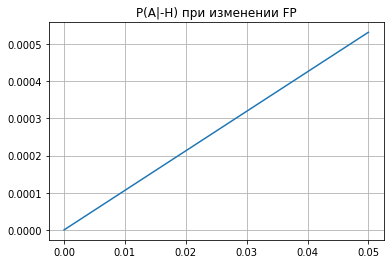

In [8]:
fig, ax = plt.subplots()
ax.grid()
list_fp = np.linspace(0, 0.05, 21)
ax.plot(list_fp, [get_posterior_a_not_h(fp=fp) for fp in list_fp])
plt.title('P(A|-H) при изменении FP');

$P(A|\bar{H})$ - вероятность что человек болен, при условии что тест отрицателен, следовательно выгодно чтобы вероятность падала. Вероятность падает сильнее при уменьшении FP

Вывод: нужно определиться что важнее. Если выгоднее $P(A|H)$, то нужно уменьшать FN, если выгднее $P(A|\bar{H})$, то нужно уменьшать FP

# Часть 2

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

import scipy.stats as sts

import matplotlib.pyplot as plt
%matplotlib inline

# Задание 1. Сбор и препроцессинг данных

In [10]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

df.loc[df['new_cases']==0, 'new_cases'] = 1

df['date'] = df['date'].astype('datetime64[ns]')
df = df[(df.location=='Russia') & (df['date']>=pd.to_datetime('2020-03-03'))
        & (df['date']<=pd.to_datetime('2020-09-02'))
       ].reset_index(drop=True)

print(df.shape)
df.head()

(184, 59)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
1,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
3,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
4,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


In [11]:
df.sort_values('date', inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index':'day_num'}, inplace=True)
df['day_num'] += 1
df.head()

,day_num,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,1,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
1,2,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
2,3,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
3,4,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
4,5,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


# Задание 2

Построим графики зависимости total_cases и new_cases от дня

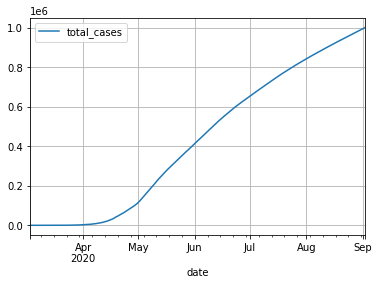

In [12]:
df.plot('date', 'total_cases', grid=True);

<AxesSubplot:xlabel='date'>

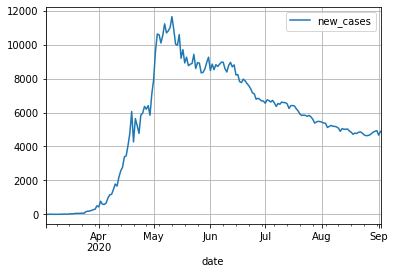

In [13]:
df.plot('date', 'new_cases', grid=True)

По данным графикам видим, что зависимость нелинейная и по началу похожа на экспоненциальную. В случае total_cases со временем падает скорость роста графика. В случае new_cases видим, что кол-во новых случаев со временем начинает падать.

### feature: exp_day_num - экспонента от номера дня
### target: total_cases

## 2.a

In [14]:
df['exp_day_num'] = np.exp(df['day_num'])
df_train = df[df.index<50]
df_test = df[df.index>=50]

Оценим обычную линейную регрессию $y \sim w*x+b$, где $x = exp(day\_num)$

In [15]:
lr = LinearRegression()
X_train = df_train[['exp_day_num']].values
y_train = df_train['total_cases'].values

X_test = df_test[['exp_day_num']].values
y_test = df_test['total_cases'].values

lr.fit(X_train, y_train)

LinearRegression()

In [16]:
predict_lr_train = lr.predict(X_train)
predict_lr_test = lr.predict(X_test)

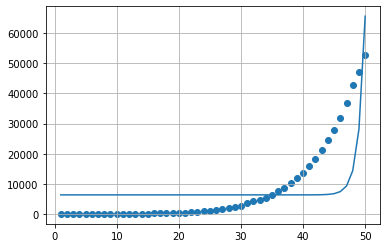

In [17]:
fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_train['day_num'].values, y_train)
ax.plot(df_train['day_num'].values, predict_lr_train)

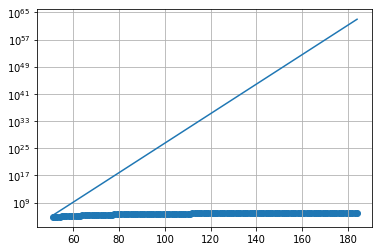

In [18]:
fig, ax = plt.subplots()
ax.grid()
#логарифмическая шкала
ax.set_yscale('log')
ax.scatter(df_test['day_num'].values, y_test)
ax.plot(df_test['day_num'].values, predict_lr_test)

Видим что экспонента на трейне обладает хоть какой-то обобщающей способностью, на тесте предсказания становятся сильно хуже. т.к. модель предсказывает сильно выше.

## 2.b

Теперь обучим байесовскую лин. регрессию. В качестве априорного распределения возьмем нормальное.

In [19]:
lr_ridge = Ridge(alpha=10000)

lr_ridge.fit(X_train, y_train)
predict_ridge_train = lr_ridge.predict(X_train)
predict_ridge_test = lr_ridge.predict(X_test)

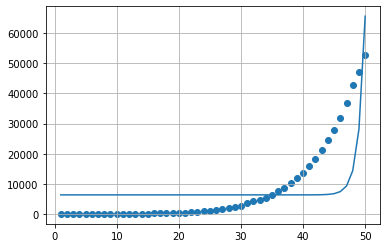

In [20]:
fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_train['day_num'].values, y_train)
ax.plot(df_train['day_num'].values, predict_ridge_train)

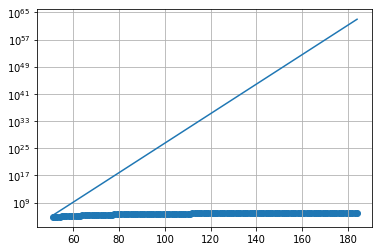

In [21]:
fig, ax = plt.subplots()
ax.grid()
#логарифмическая шкала
ax.set_yscale('log')
ax.scatter(df_test['day_num'].values, y_test)
ax.plot(df_test['day_num'].values, predict_ridge_test)

Особых изменений не наблюдается

## 2.c

In [22]:
lr.coef_

array([1.14380396e-17])

In [23]:
lr_ridge.coef_

array([1.14380396e-17])

In [24]:
lr.intercept_

6326.1449180494155

In [25]:
lr_ridge.intercept_

6326.144918049415

In [26]:
sigma = np.std(y_train-predict_ridge_train)
sigma

10079.131476619425

Оценив параметры модели можем просэмплировать из нормального распределения с параметрами mu и sigma, где <br>
<b>mu</b> - предсказание модели в точке (модель возвращает мат. ожидание) <br>
<b>sigma</b> - оцененное стандартное отклоненение

In [27]:
def get_day_num(date, df=df, field='exp_day_num'):
    """
    date format 'yyyy-mm-dd'
    """
    return df[df.date==pd.to_datetime(date)][field].to_list()[0]

def get_predict_dist(date, field='exp_day_num', std=sigma, model=lr_ridge, size=100):
    x = np.array([[get_day_num(date, field=field)]])
    mu = model.predict(x)[0]
    return np.random.normal(loc=0, scale=std, size=size)

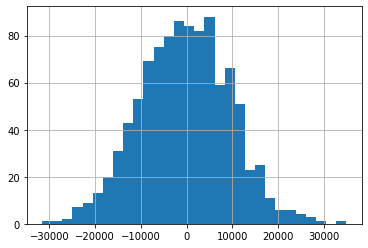

In [28]:
fig, ax = plt.subplots()
ax.grid()

gt = df[df.date==pd.to_datetime('2020-05-01')]['total_cases'].to_list()[0]
ax.hist(get_predict_dist('2020-05-01', size=1000), bins=30);
#ax.plot([gt, gt], [0, 90])

на более позних датах графики не отрисовываются (из-за размера числа и маленькой сигмы)

### feature: day_num 
### target: log_total_cases - логарифм от числа случаев заболеваний

## 2.a, b, c

In [29]:
df['log_total_cases'] = np.log(df['total_cases'])
df_train = df[df.index<50]
df_test = df[df.index>=50]

In [30]:
lr = LinearRegression()
X_train = df_train[['day_num']].values
y_train = df_train['log_total_cases'].values

X_test = df_test[['day_num']].values
y_test = df_test['log_total_cases'].values

lr.fit(X_train, y_train)

LinearRegression()

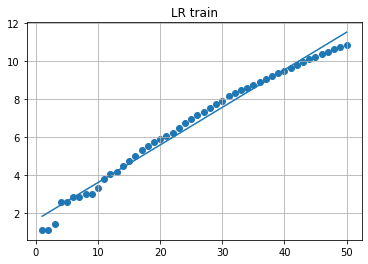

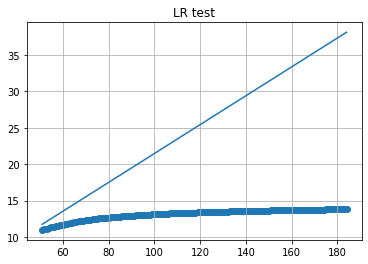

In [31]:
predict_lr_train = lr.predict(X_train)
predict_lr_test = lr.predict(X_test)


fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_train['day_num'].values, y_train)
ax.plot(df_train['day_num'].values, predict_lr_train)
plt.title('LR train');


fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_test['day_num'].values, y_test)
ax.plot(df_test['day_num'].values, predict_lr_test)
plt.title('LR test');

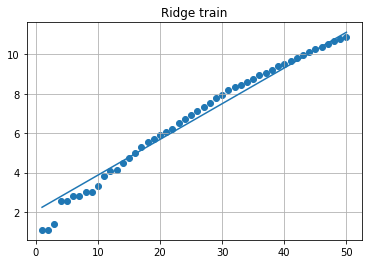

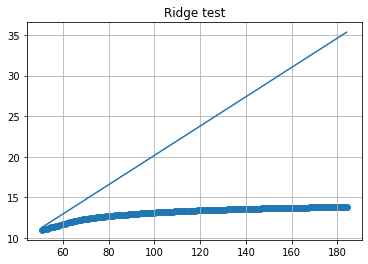

In [32]:
lr_ridge = Ridge(alpha=1000)

lr_ridge.fit(X_train, y_train)
predict_ridge_train = lr_ridge.predict(X_train)
predict_ridge_test = lr_ridge.predict(X_test)

fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_train['day_num'].values, y_train)
ax.plot(df_train['day_num'].values, predict_ridge_train)
plt.title('Ridge train');

fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_test['day_num'].values, y_test)
ax.plot(df_test['day_num'].values, predict_ridge_test)
plt.title('Ridge test');

В целом результаты не особо отличаются от предыдущего подхода

In [33]:
def get_predict_dist(date, field='exp_day_num', std=sigma, model=lr_ridge, size=100):
    x = np.array([[get_day_num(date, field=field)]])
    mu = model.predict(x)[0]
    return np.random.normal(loc=mu, scale=std, size=size)

In [34]:
sigma = np.std(y_train-predict_ridge_train)
sigma

0.4297654890970456

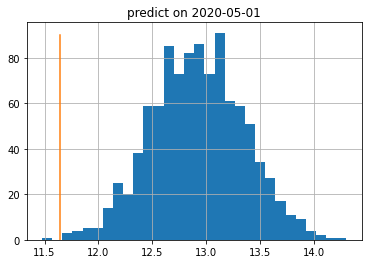

In [35]:
fig, ax = plt.subplots()
ax.grid()

gt = df[df.date==pd.to_datetime('2020-05-01')]['log_total_cases'].to_list()[0]
dist = get_predict_dist('2020-05-01', field='day_num', size=1000, model=lr_ridge, std=sigma)

ax.hist(dist, bins=30);
ax.plot([gt, gt], [0, 90])
plt.title('predict on 2020-05-01');

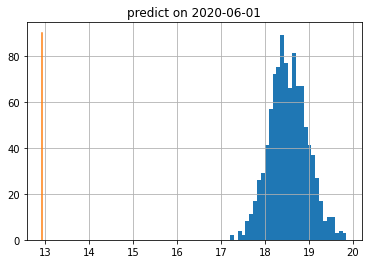

In [36]:
fig, ax = plt.subplots()
ax.grid()

gt = df[df.date==pd.to_datetime('2020-06-01')]['log_total_cases'].to_list()[0]
dist = get_predict_dist('2020-06-01', field='day_num', size=1000, model=lr_ridge, std=sigma)

ax.hist(dist, bins=30);
ax.plot([gt, gt], [0, 90])
plt.title('predict on 2020-06-01');

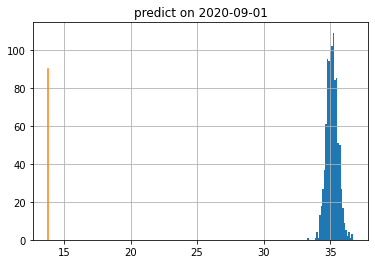

In [37]:
fig, ax = plt.subplots()
ax.grid()

gt = df[df.date==pd.to_datetime('2020-09-01')]['log_total_cases'].to_list()[0]
dist = get_predict_dist('2020-09-01', field='day_num', size=1000, model=lr_ridge, std=sigma)

ax.hist(dist, bins=30);
ax.plot([gt, gt], [0, 90])
plt.title('predict on 2020-09-01');

Видим что даже на логарифме таргета, качество предсказания сильно падает со временем

# Задание 3

## 3.a

В 3 задании делается предположение что переменная имеет сигмоидальный вид. Оценим эту сигмоиду с помощью линейной регрессии. Так форму сигмоиды задают два параметра mu и sigma, попробуем их подобрать как гиперпараметры модели.

In [38]:
X_train = df_train[['day_num']].values
y_train = df_train['total_cases'].values

X_test = df_test[['day_num']].values
y_test = df_test['total_cases'].values


mu_0 = np.mean(X_train)
sigma_0 = 2 * np.std(X_train)
X_train_scale = (X_train - mu_0) / sigma_0
X_test_scale = (X_test - mu_0) / sigma_0

In [39]:
def calc_mse(X_train_scale, y_train, param):
    X_train_scale_cdf = sts.norm.cdf(X_train_scale, loc=param['mu'], scale=param['sigma'])
    lr = LinearRegression()
    lr.fit(X_train_scale_cdf, y_train)
    
    predict_lr_train = lr.predict(X_train_scale_cdf)
    return mean_squared_error(y_train, predict_lr_train)

params = {'mu':np.linspace(0, 3, 100), 'sigma':np.linspace(0.1, 5, 20)}
params = ParameterGrid(params)

In [40]:
results = []
for param in params:
    mse = calc_mse(X_train_scale, y_train, param)
    param['mse'] = mse
    results.append(param)
    
pd.DataFrame(results).sort_values('mse')[:2]

,mu,sigma,mse
1282,1.939394,0.615789,50739.955006
1262,1.909091,0.615789,52415.682621


In [41]:
best_params = pd.DataFrame(results).sort_values('mse')[:1].to_dict('records')[0]

In [42]:
X_train_scale_cdf = sts.norm.cdf(X_train_scale, loc=best_params['mu'], scale=best_params['sigma'])
X_test_scale_cdf = sts.norm.cdf(X_test_scale, loc=best_params['mu'], scale=best_params['sigma'])

Text(0.5, 1.0, 'LR test')

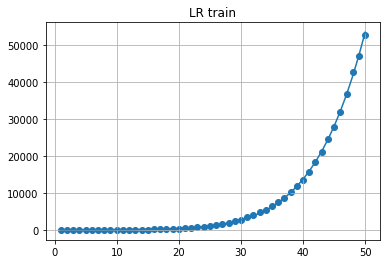

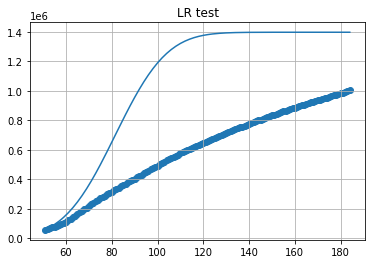

In [43]:
lr = LinearRegression()
lr.fit(X_train_scale_cdf, y_train)
predict_lr_train = lr.predict(X_train_scale_cdf)
predict_lr_test = lr.predict(X_test_scale_cdf)

fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_train['day_num'].values, y_train)
ax.plot(df_train['day_num'].values, predict_lr_train)
plt.title('LR train')

fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_test['day_num'].values, y_test)
ax.plot(df_test['day_num'].values, predict_lr_test)
plt.title('LR test')

Подобрали наилучшую форму сигмоиды с помощью линейной регрессии на трейне. На тесте качество ожидаемо упало. Но это все-равно гораздо лучше, чем в предыдущем пункте

### 3.b

In [44]:
def calc_mse_ridge(X_train_scale, y_train, param):
    X_train_scale_cdf = sts.norm.cdf(X_train_scale, loc=param['mu'], scale=param['sigma'])
    lr = Ridge(alpha=param['alpha'])
    lr.fit(X_train_scale_cdf, y_train)
    
    predict_lr_train = lr.predict(X_train_scale_cdf)
    return mean_squared_error(y_train, predict_lr_train)

params = {'mu':np.linspace(0, 3, 100), 'sigma':np.linspace(0.1, 5, 20), 'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}
params = ParameterGrid(params)

In [45]:
results = []
for param in params:
    mse = calc_mse_ridge(X_train_scale, y_train, param)
    param['mse'] = mse
    results.append(param)
    
pd.DataFrame(results).sort_values('mse')[:2]

,alpha,mu,sigma,mse
1262,0.0001,1.909091,0.615789,104987.736159
1242,0.0001,1.878788,0.615789,113514.579457


In [46]:
best_params = pd.DataFrame(results).sort_values('mse')[:1].to_dict('records')[0]

In [47]:
X_train_scale_cdf = sts.norm.cdf(X_train_scale, loc=best_params['mu'], scale=best_params['sigma'])
X_test_scale_cdf = sts.norm.cdf(X_test_scale, loc=best_params['mu'], scale=best_params['sigma'])

Text(0.5, 1.0, 'Ridge test')

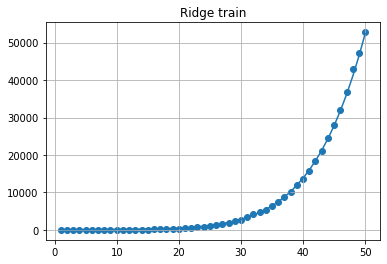

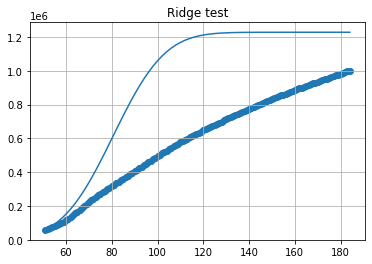

In [48]:
lr_ridge = Ridge(alpha=best_params['alpha'])
lr_ridge.fit(X_train_scale_cdf, y_train)
predict_ridge_train = lr_ridge.predict(X_train_scale_cdf)
predict_ridge_test = lr_ridge.predict(X_test_scale_cdf)

fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_train['day_num'].values, y_train)
ax.plot(df_train['day_num'].values, predict_ridge_train)
plt.title('Ridge train')

fig, ax = plt.subplots()
ax.grid()
ax.scatter(df_test['day_num'].values, y_test)
ax.plot(df_test['day_num'].values, predict_ridge_test)
plt.title('Ridge test')

Регрессия с регуляризацей, показывает более стабильный результат

### 3.с

In [49]:
def get_predict(x):
    x = (x - mu_0) / sigma_0
    x = sts.norm.cdf(x, loc=best_params['mu'], scale=best_params['sigma'])
    return lr_ridge.predict(x)[0]

In [50]:
sigma = np.std(y_train-predict_ridge_train)
sigma

324.0181108501325

10 перцентиль: 151066, 90 перцентиль: 151901


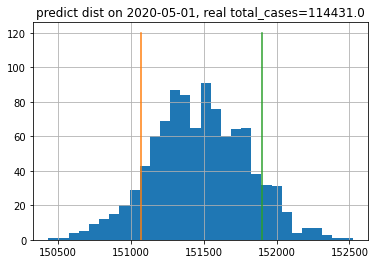

In [51]:
# предсказание числа заболеваний на 1 мая
gt = df[df.date==pd.to_datetime('2020-05-01')]['total_cases'].to_list()[0]
x = get_day_num('2020-05-01', field='day_num')
x = np.array([[x]])
mu = get_predict(x)
dist = np.random.normal(loc=mu, scale=sigma, size=1000)

fig, ax = plt.subplots()
ax.grid()
ax.hist(dist, bins=30);
ax.plot([np.percentile(dist, 10),np.percentile(dist, 10)], [0, 120])
ax.plot([np.percentile(dist, 90),np.percentile(dist, 90)], [0, 120])
plt.title(f'predict dist on 2020-05-01, real total_cases={gt}');

print(f'10 перцентиль: {round(np.percentile(dist, 10))}, 90 перцентиль: {round(np.percentile(dist, 90))}')

10 перцентиль: 885111, 90 перцентиль: 885944


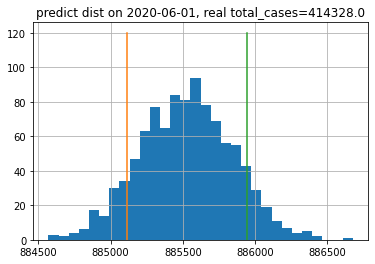

In [52]:
# предсказание числа заболеваний на 1 мая
gt = df[df.date==pd.to_datetime('2020-06-01')]['total_cases'].to_list()[0]
x = get_day_num('2020-06-01', field='day_num')
x = np.array([[x]])
mu = get_predict(x)
dist = np.random.normal(loc=mu, scale=sigma, size=1000)

fig, ax = plt.subplots()
ax.grid()
ax.hist(dist, bins=30);
ax.plot([np.percentile(dist, 10),np.percentile(dist, 10)], [0, 120])
ax.plot([np.percentile(dist, 90),np.percentile(dist, 90)], [0, 120])
plt.title(f'predict dist on 2020-06-01, real total_cases={gt}');

print(f'10 перцентиль: {round(np.percentile(dist, 10))}, 90 перцентиль: {round(np.percentile(dist, 90))}')

10 перцентиль: 1228146, 90 перцентиль: 1228967


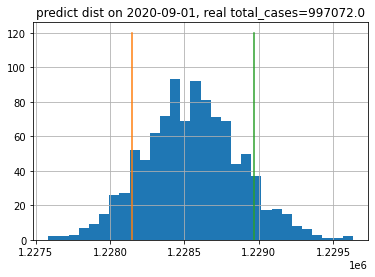

In [53]:
# предсказание числа заболеваний на 1 мая
gt = df[df.date==pd.to_datetime('2020-09-01')]['total_cases'].to_list()[0]
x = get_day_num('2020-09-01', field='day_num')
x = np.array([[x]])
mu = get_predict(x)
dist = np.random.normal(loc=mu, scale=sigma, size=1000)

fig, ax = plt.subplots()
ax.grid()
ax.hist(dist, bins=30);
ax.plot([np.percentile(dist, 10),np.percentile(dist, 10)], [0, 120])
ax.plot([np.percentile(dist, 90),np.percentile(dist, 90)], [0, 120])
plt.title(f'predict dist on 2020-09-01, real total_cases={gt}');

print(f'10 перцентиль: {round(np.percentile(dist, 10))}, 90 перцентиль: {round(np.percentile(dist, 90))}')